### RNN -> MNIST

1. import module
2. 데이터 불러오기: Keras Dataset MNIST
3. RNN 모델 구성
4. 모델 Compile
5. 학습 수행
6. 학습 결과 테스트
7. 성능 그래프
8. 테스트

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [5]:
# RNN  입력 구조: Batch * 문장의 각 단어 * 임베딩 크기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28)
x_test = x_test.reshape(x_test.shape[0], 28, 28)
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
# RNN model sees the 28 x 28 MNIST image as a sequence of 28 "rows", 
# and it feeds one 28-pixel row into the RNN at each time-step

model = Sequential()
# units: Sets the number of recurrent neurons (hidden units) inside the SimpleRNN layer
# Therefore, with units=256, the hidden state has length 256, 
# and the output at each time step is a 256-dimensional vector

# Reads each 28 x 28 image row-by-row (28 time-steps) and outputs a 256-dim vector for every step 
model.add(SimpleRNN(units =256, return_sequences = True, input_shape = (28,28)))
model.add(Dropout(0.3))
model.add(SimpleRNN(units = 256, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation ='softmax'))

/Users/shinjoohwan/miniconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# 모델 compile: y 레이블에 대해 원핫인코딩 수행
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [9]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [10]:
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 28, 256)        │        72,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,858 (808.04 KB)

 Trainable params: 206,858 (808.04 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
EPOCHS = 5
BATCH_SIZE = 1024

In [12]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [13]:
es = EarlyStopping(monitor = 'val_loss', patience=4, mode='min', verbose = 1)
mc = ModelCheckpoint('best_model.h5', monitor = 'val_accuracy', mode = 'max', save_best_only = True, verbose = 1)

In [14]:
history = model.fit(x_train, y_train, epochs = EPOCHS, batch_size = BATCH_SIZE, callbacks = [es, mc], validation_data = (x_test, y_test))

Epoch 1/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.6683 - loss: 0.9945
Epoch 1: val_accuracy improved from -inf to 0.93820, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - accuracy: 0.6707 - loss: 0.9874 - val_accuracy: 0.9382 - val_loss: 0.1940
Epoch 2/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.9344 - loss: 0.2161
Epoch 2: val_accuracy improved from 0.93820 to 0.96110, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - accuracy: 0.9346 - loss: 0.2156 - val_accuracy: 0.9611 - val_loss: 0.1196
Epoch 3/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.9574 - loss: 0.1378
Epoch 3: val_accuracy improved from 0.96110 to 0.96630, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - accuracy: 0.9574 - loss: 0.1378 - val_accuracy: 0.9663 - val_loss: 0.1109
Epoch 4/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.9638 - loss: 0.1209
Epoch 4: val_accuracy improved from 0.96630 to 0.97540, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - accuracy: 0.9639 - loss: 0.1208 - val_accuracy: 0.9754 - val_loss: 0.0792
Epoch 5/5
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.9715 - loss: 0.0930
Epoch 5: val_accuracy improved from 0.97540 to 0.97810, saving model to best_model.h5


59/59 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - accuracy: 0.9715 - loss: 0.0930 - val_accuracy: 0.9781 - val_loss: 0.0693


In [15]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9744 - loss: 0.0800


[0.06932290643453598, 0.9781000018119812]

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
x_range = range(1, len(history.history['accuracy'])+ 1)

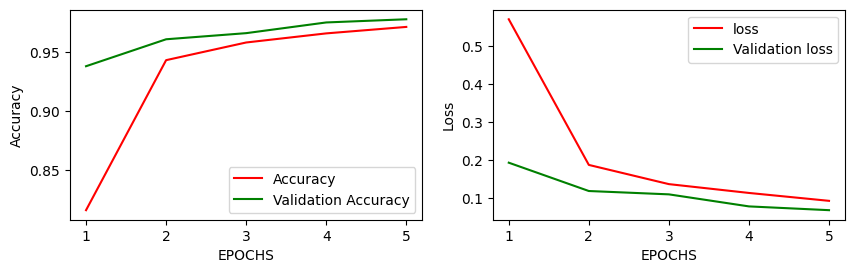

In [19]:
plt.figure(figsize = (10,6))
plt.subplot(221)
plt.plot(x_range, history.history['accuracy'], color = 'red', label = "Accuracy")
plt.plot(x_range, history.history['val_accuracy'], color = 'green', label = "Validation Accuracy")
plt.xlabel("EPOCHS")
plt.ylabel("Accuracy")
plt.legend()
plt.subplot(222)
plt.plot(x_range, history.history['loss'], color = 'red', label = "loss")
plt.plot(x_range, history.history['val_loss'], color = 'green', label = "Validation loss")
plt.xlabel("EPOCHS")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [33]:
x_test[0].shape

(28, 28)

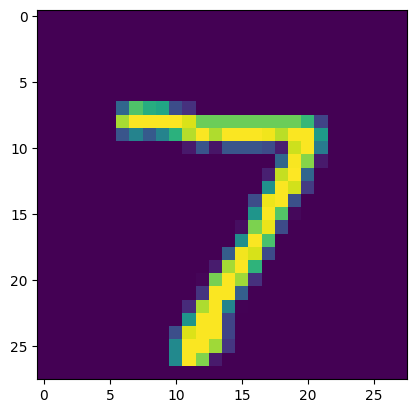

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Prediction Probability:  [[5.3258867e-07 1.8436647e-06 4.8308279e-06 3.0142675e-05 6.4634435e-08
  1.8802581e-07 3.4325431e-09 9.9994195e-01 1.2693413e-07 2.0230735e-05]]
The Answer is  [7]


In [40]:
n = 0
plt.imshow(x_test[n].reshape(28, 28))
plt.show()

pred = model.predict(x_test[n].reshape(1, 28, 28))
answer = np.argmax(pred, axis = 1)

print("Prediction Probability: ", pred)
print("The Answer is ", answer)